### ASTR 8070: Astrostatistics
***S. R. Taylor***
___

# Homework 9
### Due: Saturday, Apr 13th at 11.59pm CDT
---

The first homework problem this week is very subjective, and necessarily deal with some randomization in your solutions. Do your best to fully catalog your tests, checks, and thought process as you answer. 

## Problem 1


Go to the TensorFlow playground [here](https://playground.tensorflow.org/#activation=linear&regularization=L2&batchSize=10&dataset=xor&regDataset=reg-plane&learningRate=0.01&regularizationRate=0&noise=35&networkShape=1&seed=0.50246&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false). You will play with the tensorflow neural network architecture there, and come back to answer the questions here.


1. The model as given combines two input features into a single neuron with a linear activation of form $f(x) = x$. Write down an equation that algebraically describes the output of this network, in terms of the synapse weights, the neuron bias, and the input data. Based on your equation, will this model learn any nonlinearities? Run the network to confirm your guess.


2. Try increasing the number of neurons in the hidden layer from 1 to 2, and also try changing from a Linear activation to a nonlinear activation like ReLU. Can you create a model that can learn nonlinearities? Can it model the data effectively? Check through multiple re-runs. *Note that you can hover over the neurons to see which features they are identifying.*


3. Try increasing the number of neurons in the hidden layer from 2 to 3, using a nonlinear activation like ReLU. Can it model the data effectively? How does model quality vary from run to run?


4. Continue experimenting by adding or removing hidden layers and neurons per layer. Also feel free to change learning rates, regularization, and other learning settings. What is the smallest number of neurons and layers you can use that gives test loss of 0.177 or lower?


5. Does increasing the model size improve the fit, or how quickly it converges? Does this change how often it converges to a good model? For example, try the following architecture:

- First hidden layer with 3 neurons.
- Second hidden layer with 3 neurons.
- Third hidden layer with 2 neurons.

## Problem 2

The first few steps of this problem are the same as last week's homework.


1. Read in the same galaxy color data as used in Homework 8. Slice the data array to only take every other 10th row. From this reduced data volume, create arrays of $(u-g)$, $(g-r)$, $(r-i)$, and $(i-z)$ colors. Also create arrays of redshift and the spectral class. 


2. We're going to make classification pretty tough for our deep neural network. Make a scatter plot of $(r-i)$ versus $(i-z)$, color coding by galaxy or quasar class. Notice how much more difficult the visual discrimination is compared to $(u-g)$ versus $(g-r)$. The plot should include appropriate axis labels and a legend.


3. Stack the $(r-i)$ and $(i-z)$ colors into a data matrix, $X$. Create a target label array that has $0$ for a regular galaxy and $1$ for a quasar. Perform a train-test split, taking $20\%$ of the data for testing. Set the `random_state` in your train-test split to be `42` for reproducibility (and easy comparison with my solutions).


4. Scale your training and testing data to prepare it for the DNN. 


5. Train scikit-learn's multi-layer perceptron classifier with ReLU activation, stochastic gradient descent, two hidden layers of respective sizes of $5$ and $2$, and using `max_iter=1000`, and `random_state=42`. As with classifiers in last week's homework, plot an ROC curve that shows the network's performance on the scaled testing data. 


6. Now let's optimize the hyperparameters of your network. You will use `GridSearchCV` with the following hyperparameters for the network:

```
parameters = {'solver': ['lbfgs', 'sgd', 'adam'], 
              'hidden_layer_sizes': [(2,2), (5,5), (5,2), (5,5,5)], 
              'activation': ['relu', 'tanh'], 
              'random_state': [42], 'max_iter': [1000]}
```

Remember that you can utilize all availables cores on your machine with `n_jobs=-1`. Print out the classification score for the training data, and the best parameters obtained by the cross validation.


7. Fit a new DNN using the best hyperparameters obtained in (6), and make a plot that has ROC curves for this new network and your original network. Let the x and y axes have the full limit range of 0 to 1. Voila!

# Question 1

Part 1

Given that the output layer is defined by $$ (o_k) $$, and there's only one neuron in the hidden layer, the equation for the output is:

$$ o_k = g(w_{1k} \cdot a_1 + b_k) $$

where:

$$ a_1 = w_{x1} \cdot x_1 + w_{x2} \cdot x_2 + b_1 $$

-  \( g \) is the activation function for the output layer.
- \( w_{1k} \) is the weight from the first neuron to the output neuron.
- \( b_k \) is the bias of the output neuron.
- \( w_{x1} \), \( w_{x2} \) are the weights of the inputs \( x_1 \), \( x_2 \) respectively.
- \( b_1 \) is the bias of the hidden neuron.


Thus, substituting  $$( a_1 )  $$ into the equation for  $$( o_k )  $$we get:

$$ o_k = g(w_{1k} \cdot (w_{x1} \cdot x_1 + w_{x2} \cdot x_2 + b_1) + b_k) $$

Given the linear nature of the output equation with respect to the input variables x1 and x2, it is unlikely that the model will be able to capture any nonlinear relationships. After many run the model consistently failed to recognize any nonlinear patterns


SRT: Good deduction, Kamara. Although not explicitly stated, the output activation was linear too, so everything is linear.

Part 2

![Screenshot 2024-04-13 at 5.41.47 PM.png](<attachment:Screenshot 2024-04-13 at 5.41.47 PM.png>) ![Screenshot 2024-04-13 at 5.40.51 PM.png](<attachment:Screenshot 2024-04-13 at 5.40.51 PM.png>) ![Screenshot 2024-04-13 at 5.40.04 PM.png](<attachment:Screenshot 2024-04-13 at 5.40.04 PM.png>)

When utilizing two neurons in the hidden layer paired with ReLU activation functions, the model demonstrates the ability to learn nonlinear patterns. However, it still faces challenges in effectively modeling the data comprehensively
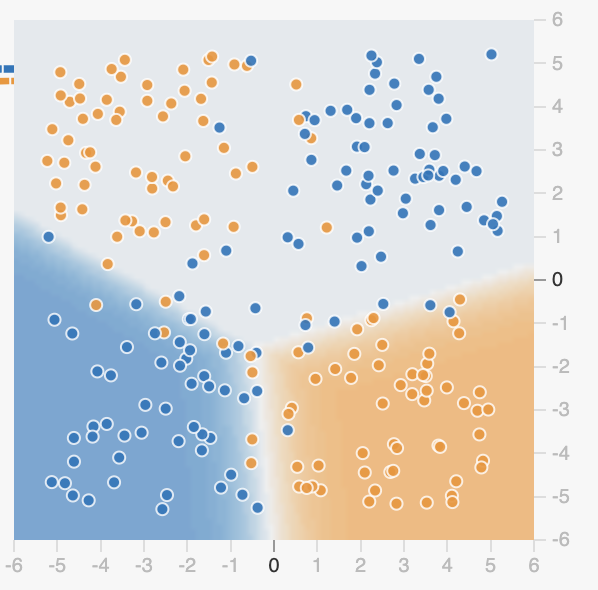
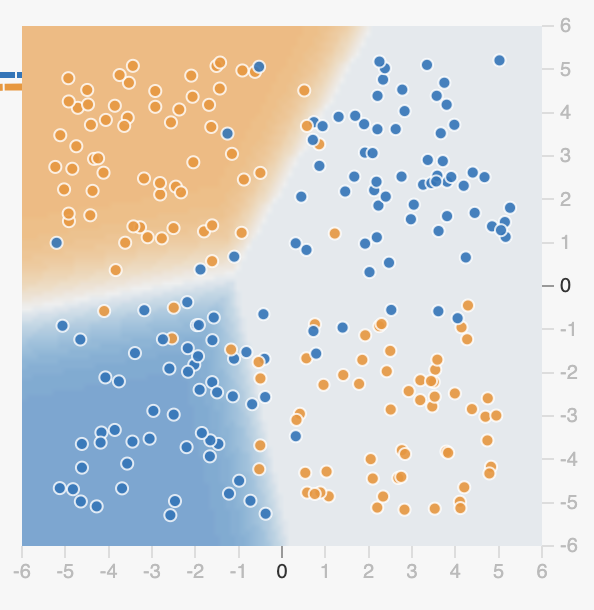
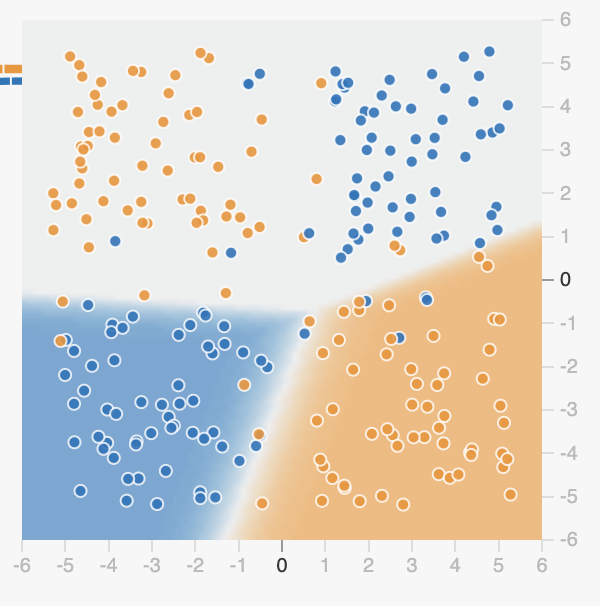

part 3

![Screenshot 2024-04-13 at 5.54.14 PM.png](<attachment:Screenshot 2024-04-13 at 5.54.14 PM.png>) ![Screenshot 2024-04-13 at 5.55.14 PM.png](<attachment:Screenshot 2024-04-13 at 5.55.14 PM.png>)

In several trials, the model has shown a marked improvement in effectively capturing the data's patterns, performing significantly better than in previous iterations, as indicated by the low test loss recorded in both runs.
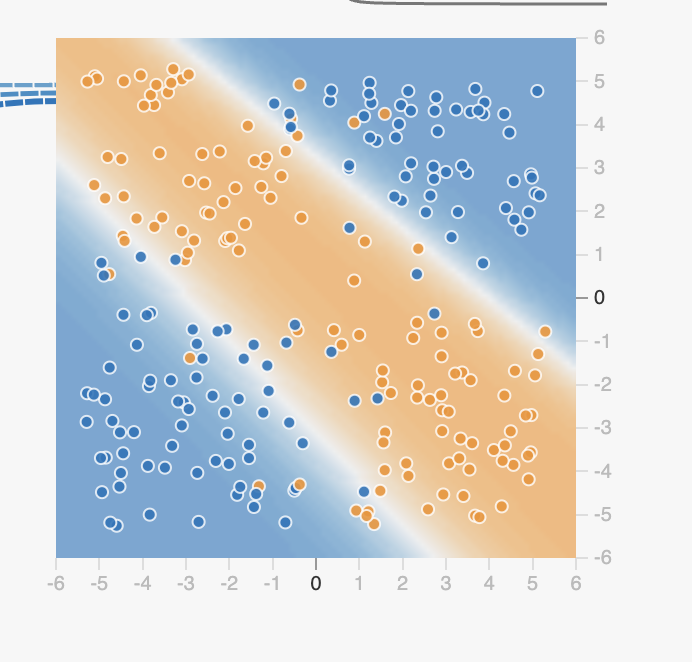
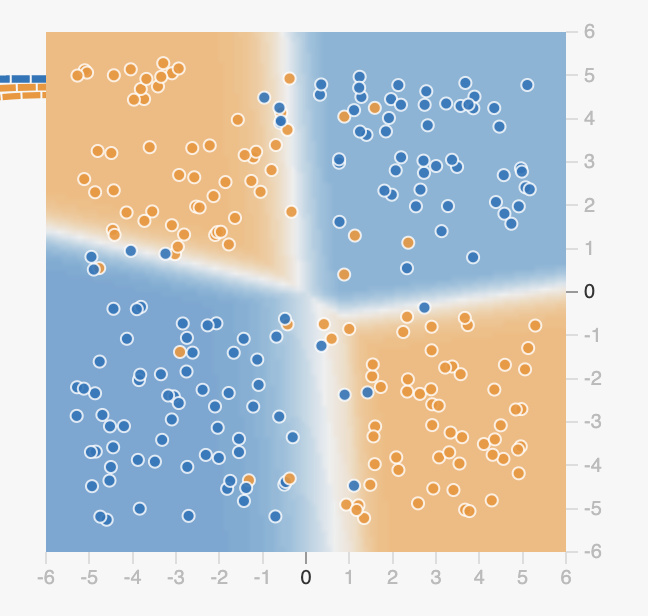

part 4

![Screenshot 2024-04-13 at 6.00.56 PM.png](<attachment:Screenshot 2024-04-13 at 6.00.56 PM.png>) 

This is the smallest i got it, with more than 1000 epochs
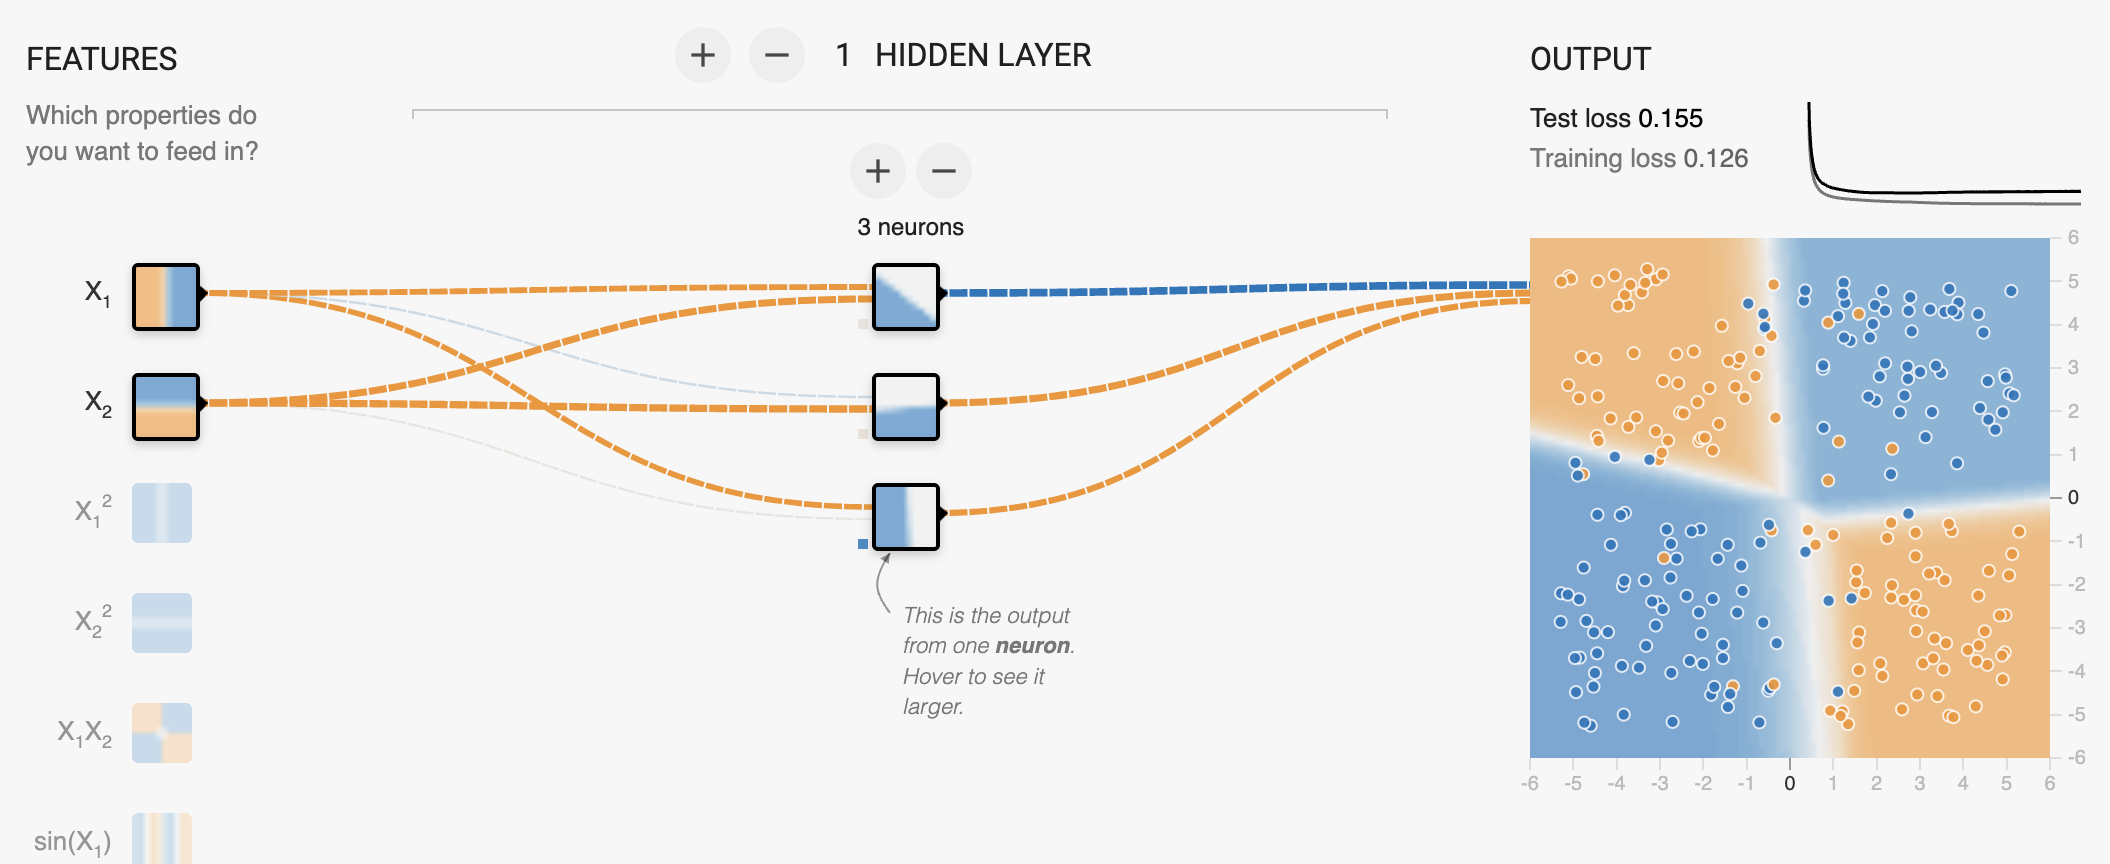

SRT: Impressive!

part 5/

Increasing the model’s complexity doesn’t guarantee better performance, as demonstrated by test loss values similar to those in parts 3 and 4. However, models equipped with a tanh activation function consistently reach convergence faster than those using ReLU. Furthermore, more complex configurations, tend to achieve stable and effective convergence more reliably than simpler models with only one hidden layer and three neurons

SRT: Good commentary here.

# Question 2

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = np.load("../../homeworks/hw_data/hw8_data_1.npy", allow_pickle=True)


# Slice the data array to only take every other 10th row
sliced_data = data[::10]

# Create arrays of colors and other parameters
u_g = sliced_data['u'] - sliced_data['g']
g_r = sliced_data['g'] - sliced_data['r']
r_i = sliced_data['r'] - sliced_data['i']
i_z = sliced_data['i'] - sliced_data['z']
redshift = sliced_data['redshift']
spectral_class = sliced_data['specClass']


part 2

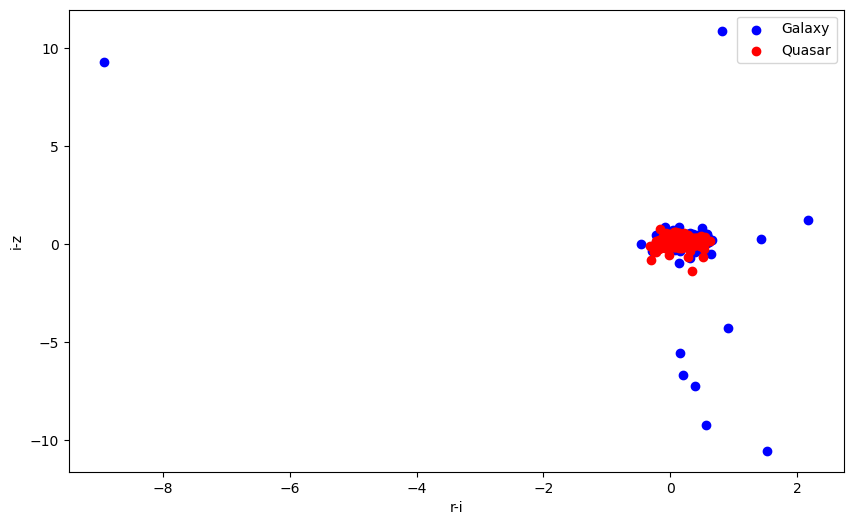

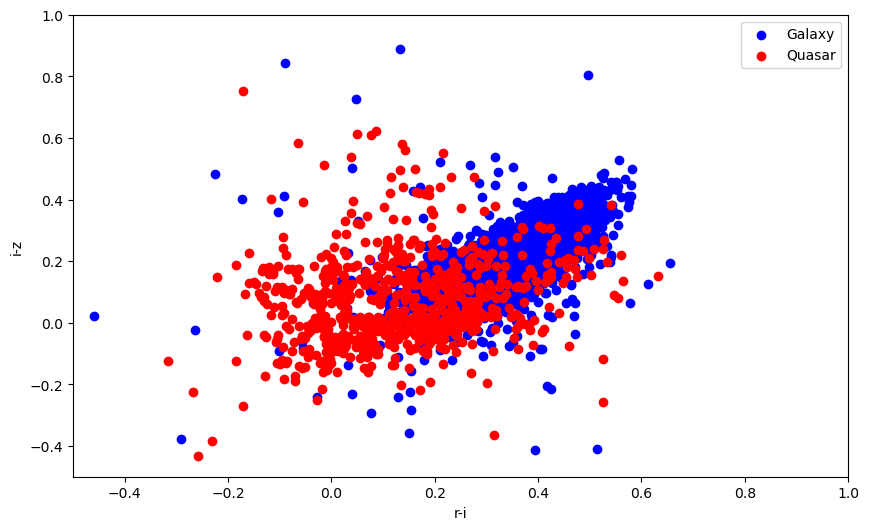

In [25]:
import matplotlib.pyplot as plt

def plot_scatter(r_i, i_z, spec_class, set_limits=False):
    # Create a scatter plot of (r-i) versus (i-z), color coding by galaxy or quasar class
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.scatter(r_i[spec_class == 'GALAXY'], i_z[spec_class == 'GALAXY'], color='blue', label='Galaxy')
    ax.scatter(r_i[spec_class == 'QSO'], i_z[spec_class == 'QSO'], color='red', label='Quasar')
    
    # Set labels and legend
    ax.set_xlabel('r-i')
    ax.set_ylabel('i-z')
    ax.legend()
    
    # Set axis limits if specified
    if set_limits:
        ax.set_xlim(-0.5, 1)
        ax.set_ylim(-0.5, 1)
    
    plt.show()

# Plot without axis limits
plot_scatter(r_i, i_z, spectral_class)

# Plot with axis limits
plot_scatter(r_i, i_z, spectral_class, set_limits=True)

SRT: Glad you limited the plot to not show the outliers!

part 3

In [28]:
from sklearn.model_selection import train_test_split

def prepare_data(r_i, i_z, spec_class):
    # Stack the (r-i) and (i-z) colors into a data matrix, X
    X = np.column_stack((r_i, i_z))
    
    # Create a target label array that has 0 for a regular galaxy and 1 for a quasar
    y = np.where(spec_class == 'GALAXY', 0, 1)
    
    # Perform a train-test split, taking 20% of the data for testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    return X_train, X_test, y_train, y_test

# Use the function
X_train, X_test, y_train, y_test = prepare_data(r_i, i_z, spectral_class)

part 4

In [29]:
from sklearn.preprocessing import StandardScaler

def scale_data(X_train, X_test):
    # Initialize the scaler
    scaler = StandardScaler()
    
    # Fit the scaler to the training data and transform it
    X_train_scaled = scaler.fit_transform(X_train)
    
    # Transform the testing data
    X_test_scaled = scaler.transform(X_test)
    
    return X_train_scaled, X_test_scaled

# Use the function
X_train_scaled, X_test_scaled = scale_data(X_train, X_test)

part 5

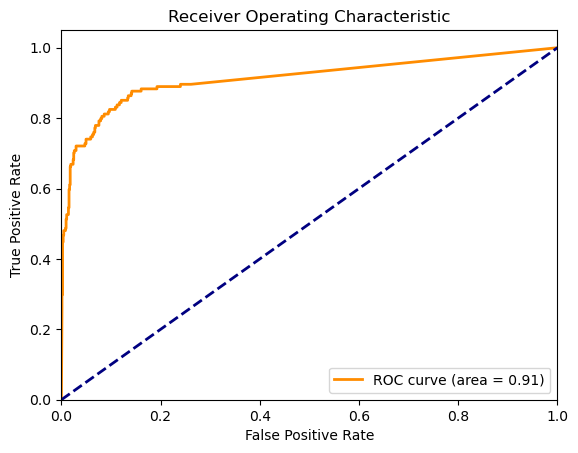

In [30]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def train_and_plot_roc(X_train_scaled, y_train, X_test_scaled, y_test):
    # Initialize the MLPClassifier
    clf = MLPClassifier(hidden_layer_sizes=(5, 2), activation='relu', solver='sgd', max_iter=1000, random_state=42)
    
    # Train the classifier
    clf.fit(X_train_scaled, y_train)
    
    # Predict the probabilities of the classes
    y_score = clf.predict_proba(X_test_scaled)[:, 1]
    
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

# Use the function
train_and_plot_roc(X_train_scaled, y_train, X_test_scaled, y_test)

part 6

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

def optimize_hyperparameters(X_train_scaled, y_train):
    # Define the hyperparameters
    parameters = {
        'solver': ['lbfgs', 'sgd', 'adam'], 
        'hidden_layer_sizes': [(2,2), (5,5), (5,2), (5,5,5)], 
        'activation': ['relu', 'tanh'], 
        'random_state': [42], 
        'max_iter': [1000]
    }
    
    # Initialize the MLPClassifier
    clf = MLPClassifier()
    
    # Initialize GridSearchCV
    grid_search = GridSearchCV(clf, parameters, n_jobs=-1, cv=5)
    
    # Fit GridSearchCV
    grid_search.fit(X_train_scaled, y_train)
    
    # Print the classification score for the training data and the best parameters
    print("Best parameters found: ", grid_search.best_params_)
    print("Best score found: ", grid_search.best_score_)

# Use the function
optimize_hyperparameters(X_train_scaled, y_train)
best_params = optimize_hyperparameters(X_train_scaled, y_train)

/opt/anaconda3/envs/astr8070/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/envs/astr8070/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/envs/astr8070/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed t

Best parameters found:  {'activation': 'relu', 'hidden_layer_sizes': (5, 5, 5), 'max_iter': 1000, 'random_state': 42, 'solver': 'lbfgs'}
Best score found:  0.9355


/opt/anaconda3/envs/astr8070/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/envs/astr8070/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/envs/astr8070/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed t

Best parameters found:  {'activation': 'relu', 'hidden_layer_sizes': (5, 5, 5), 'max_iter': 1000, 'random_state': 42, 'solver': 'lbfgs'}
Best score found:  0.9355


part 7

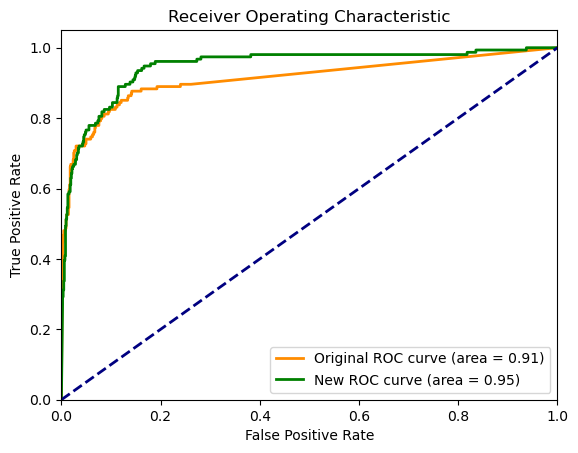

In [37]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def compare_networks(X_train_scaled, y_train, X_test_scaled, y_test, best_params):
    # Initialize the original MLPClassifier
    clf_original = MLPClassifier(hidden_layer_sizes=(5, 2), activation='relu', solver='sgd', max_iter=1000, random_state=42)
    
    # Train the original classifier
    clf_original.fit(X_train_scaled, y_train)
    
    # Predict the probabilities of the classes for the original classifier
    y_score_original = clf_original.predict_proba(X_test_scaled)[:, 1]
    
    # Compute ROC curve and ROC area for the original classifier
    fpr_original, tpr_original, _ = roc_curve(y_test, y_score_original)
    roc_auc_original = auc(fpr_original, tpr_original)

    
    
    # Initialize the new MLPClassifier with the best parameters
    clf_new = MLPClassifier(hidden_layer_sizes=(5,5,5), activation='relu', solver='lbfgs' , max_iter=1000, random_state= 42)
    
    # Train the new classifier
    clf_new.fit(X_train_scaled, y_train)
    
    # Predict the probabilities of the classes for the new classifier
    y_score_new = clf_new.predict_proba(X_test_scaled)[:, 1]
    
    # Compute ROC curve and ROC area for the new classifier
    fpr_new, tpr_new, _ = roc_curve(y_test, y_score_new)
    roc_auc_new = auc(fpr_new, tpr_new)
    
    # Plot ROC curves
    plt.figure()
    plt.plot(fpr_original, tpr_original, color='darkorange', lw=2, label='Original ROC curve (area = %0.2f)' % roc_auc_original)
    plt.plot(fpr_new, tpr_new, color='green', lw=2, label='New ROC curve (area = %0.2f)' % roc_auc_new)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

# Use the function
compare_networks(X_train_scaled, y_train, X_test_scaled, y_test, best_params)

SRT: Great work, Kamara!